In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

**Turbina eólica**
Fazer uma analise sobre alguns pontos estão fora ou dentro do "aceitável"


In [ ]:
turbina = pd.read_csv('T1.csv')
turbina.columns = ['Data/Hora', 'Active Power(kw)', 'WindSpeed(m/s)', 'Curva teórica(kWh)', 'DirecaoVento(º)'] #alterar nome das colunas
del turbina ['DirecaoVento(º)'] #deleta a coluna
turbina['Data/Hora'] = pd.to_datetime(turbina['Data/Hora']) #pega a coluna data/hora e transforma em datetime e joga dentro de 'turbina'
display(turbina)


,Data/Hora,Active Power(kw),WindSpeed(m/s),Curva teórica(kWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


Plotando os dados em um grafico

<Axes: xlabel='WindSpeed(m/s)', ylabel='Active Power(kw)'>

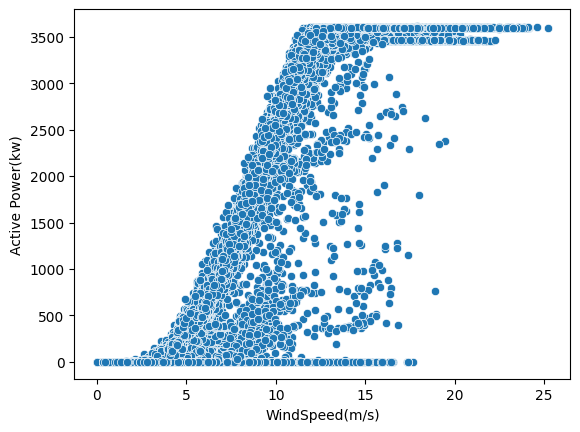

In [ ]:
#scatterplot - grafico de dispersao
sns.scatterplot(data=turbina, x="WindSpeed(m/s)", y="Active Power(kw)")

<Axes: xlabel='WindSpeed(m/s)', ylabel='Curva teórica(kWh)'>

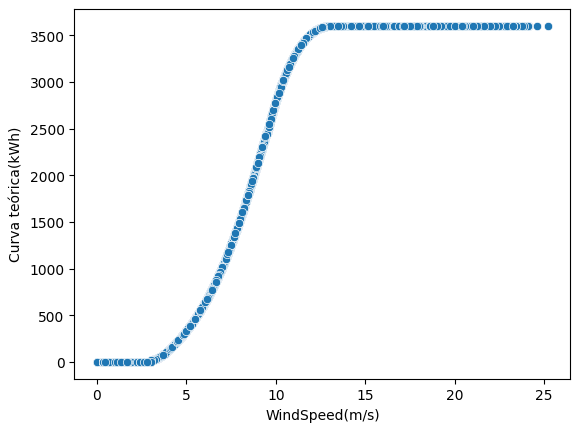

In [ ]:
sns.scatterplot(data=turbina, x="WindSpeed(m/s)", y="Curva teórica(kWh)")

**Criando limites aceitáveis**

In [ ]:
#transformar os valores em lista
potencia_real = turbina['Active Power(kw)'].tolist()
potencia_teorica = turbina['Curva teórica(kWh)'].tolist()
potencia_maxima = []
potencia_minima = []
dentro_limite = []

for potencia in potencia_teorica:
  potencia_maxima.append(potencia*1.05)
  potencia_minima.append(potencia*0.95)

In [ ]:
  print(len(potencia_maxima), len(potencia_minima), len(potencia_teorica))

50530 50530 50530


In [ ]:
dentro_limite = []

for p, potencia in enumerate(potencia_real):
  if potencia>=potencia_minima[p] and potencia<=potencia_maxima[p]:
    dentro_limite.append('Dentro')
  elif potencia == 0:
      dentro_limite.append('Zero')
  else:
      dentro_limite.append('Fora')

print(dentro_limite.count('Dentro')/len(dentro_limite))

0.37286760340391845


**adicionar lista 'dentro_limite' ao dataframe**

In [ ]:
turbina['Dentro limite'] = dentro_limite
display(turbina)

,Data/Hora,Active Power(kw),WindSpeed(m/s),Curva teórica(kWh),Dentro limite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


<Axes: xlabel='WindSpeed(m/s)', ylabel='Active Power(kw)'>

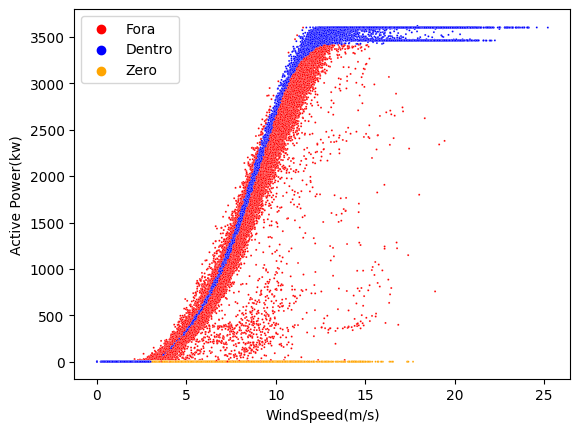

In [ ]:
cores = {'Dentro': 'blue', 'Fora': 'red', 'Zero': 'orange'}
sns.scatterplot(data=turbina, x="WindSpeed(m/s)", y="Active Power(kw)", hue=dentro_limite, s=2, palette=cores)